## Importando Bibliotecas

In [1]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Input, Dense
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
from keras.optimizers import Adam
from keras.models import Model
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot


Using TensorFlow backend.


## Pre-processamento dos dados
**Carregando os dados de treino e teste:**

In [2]:
train_images = pd.read_csv('../fashion-mnist_train.csv')
test_images = pd.read_csv('../fashion-mnist_test.csv')

**Separando as labels do conjuntos:**

In [3]:
train_labels=train_images.loc[:, ['label']]
train_images=train_images.drop(['label'], axis=1)
test_labels=test_images.loc[:, ['label']]
test_images=test_images.drop(['label'], axis=1)

**Normalizando os data-sets:**

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0


----------------------
## Construção do modelo base
**Esta rede será utilizada posteriomente para comparações entre os modelos de dimensionalidade reduzida utilizando PCA e autoencoder.**

**Definição da estrutura do modelo por meio do Keras Sequential:**

In [5]:
model = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(784)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 62,688
Trainable params: 62,688
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treino do modelo:**

In [7]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 113us/sample - loss: 0.5507 - accuracy: 0.8043 - val_loss: 0.4158 - val_accuracy: 0.8549
Epoch 2/10
48000/48000 [==============================] - 6s 116us/sample - loss: 0.3930 - accuracy: 0.8578 - val_loss: 0.4335 - val_accuracy: 0.8443
Epoch 3/10
48000/48000 [==============================] - 5s 112us/sample - loss: 0.3609 - accuracy: 0.8670 - val_loss: 0.3624 - val_accuracy: 0.8694
Epoch 4/10
48000/48000 [==============================] - 5s 99us/sample - loss: 0.3316 - accuracy: 0.8779 - val_loss: 0.3715 - val_accuracy: 0.8712
Epoch 5/10
48000/48000 [==============================] - 5s 100us/sample - loss: 0.3140 - accuracy: 0.8847 - val_loss: 0.3454 - val_accuracy: 0.8783
Epoch 6/10
48000/48000 [==============================] - 5s 99us/sample - loss: 0.2982 - accuracy: 0.8894 - val_loss: 0.3515 - val_accuracy: 0.8783
Epoch 7/10
48000/48000 [============================

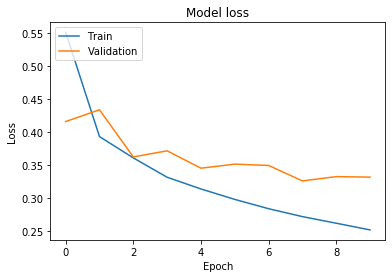

In [8]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Verificação dos resultados do modelo**

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.3101 - accuracy: 0.8891
Model - 3 layers - test loss: 31.006320104599
Model - 3 layers - test accuracy: 88.91000151634216


-----------------------------
## Redução de Dimensionalidade Usando Principal component analysis (PCA)

**Preprocessamento de dados (Feature Scaling)**

In [10]:
scaler = StandardScaler()
scaler.fit(train_images)

train_images_r = scaler.transform(train_images)
test_images_r = scaler.transform(test_images)

**Definição do número de componentes:**

In [11]:
pca = PCA(n_components=3)

**Construção dos novos datasets de treino e de teste com dimensões reduzidas usando o PCA:**

In [12]:
pca.fit(train_images_r)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
train_images_r = pca.transform(train_images_r)
test_images_r = pca.transform(test_images_r)

**Preprocessamento: normalização e alteração do tipo dos dados de numpy array para pandas dataframe:**

In [14]:
#esse conjunto rr sera utilizado pela rede neural
train_images_rr = normalize(train_images_r)
test_images_rr = normalize(test_images_r)
train_images_rr = pd.DataFrame(data=train_images_rr)
test_images_rr = pd.DataFrame(data=test_images_rr)

#esse conjunto rr sera utilizado posteriormente para a clusterizacao 
train_images_r = pd.DataFrame(data=train_images_r)
test_images_r= pd.DataFrame(data=test_images_r)

**Definição da estrutura do modelo por meio do Keras Sequential que receberá os dados com dimensões reduzidas pelo PCA:**

In [15]:
model_r = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model_r.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
Total params: 12,704
Trainable params: 12,704
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [16]:
model_r.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Normalização dos dados e Treino do modelo:**

In [17]:
history_r = model_r.fit(train_images_rr, train_labels, epochs=10, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 72us/sample - loss: 1.1458 - accuracy: 0.5650 - val_loss: 1.0386 - val_accuracy: 0.5886
Epoch 2/10
48000/48000 [==============================] - 3s 64us/sample - loss: 1.0194 - accuracy: 0.5973 - val_loss: 1.0367 - val_accuracy: 0.5922
Epoch 3/10
48000/48000 [==============================] - 3s 62us/sample - loss: 1.0100 - accuracy: 0.5993 - val_loss: 1.0135 - val_accuracy: 0.5988
Epoch 4/10
48000/48000 [==============================] - 3s 59us/sample - loss: 1.0052 - accuracy: 0.6015 - val_loss: 1.0111 - val_accuracy: 0.5983
Epoch 5/10
48000/48000 [==============================] - 3s 63us/sample - loss: 1.0015 - accuracy: 0.6043 - val_loss: 1.0126 - val_accuracy: 0.6013
Epoch 6/10
48000/48000 [==============================] - 3s 60us/sample - loss: 0.9992 - accuracy: 0.6027 - val_loss: 1.0193 - val_accuracy: 0.5946
Epoch 7/10
48000/48000 [==============================] 

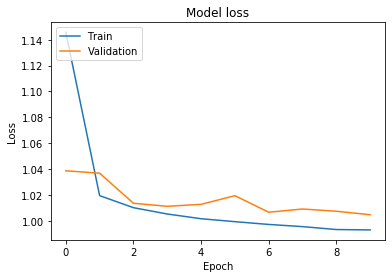

In [18]:
# Plot training & validation loss values
plt.plot(history_r.history['loss'])
plt.plot(history_r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Verificação dos resultados do modelo:**

In [19]:
test_loss, test_acc = model_r.evaluate(test_images_rr, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.9986 - accuracy: 0.6091
Model - 3 layers - test loss: 99.85791507720947
Model - 3 layers - test accuracy: 60.909998416900635


------------------------------------------------------

## Redução de Dimensionalidade Usando Autoencoders

In [20]:
# this is the size of our encoded representations
encoding_dim = 2
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoded_input = Input(shape=(encoding_dim,))
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [21]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [22]:
#REMOVER troquei o 'adadelta' pelo 'adam'
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
history_auto = autoencoder.fit(train_images, train_images,epochs=10,shuffle=True,validation_data=(test_images, test_images))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.4426 - val_loss: 0.4103
Epoch 2/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.4029 - val_loss: 0.3957
Epoch 3/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.3925 - val_loss: 0.3879
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.3853 - val_loss: 0.3810
Epoch 5/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.3798 - val_loss: 0.3772
Epoch 6/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.3774 - val_loss: 0.3758
Epoch 7/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.3766 - val_loss: 0.3752
Epoch 8/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.3761 - val_loss: 0.3749
Epoch 9/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.3759 - val_loss: 0.3

In [24]:
encoded_imgs_train = encoder.predict(train_images)
encoded_imgs_test = encoder.predict(test_images)


In [25]:
train_images_a = pd.DataFrame(data=encoded_imgs_train)
test_images_a =pd.DataFrame(data=encoded_imgs_test)

In [26]:
model_a = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(2)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model_a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
Total params: 12,640
Trainable params: 12,640
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history_a = model_a.fit(train_images_a, train_labels, epochs=10, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 86us/sample - loss: 1.2758 - accuracy: 0.4886 - val_loss: 1.1392 - val_accuracy: 0.5454
Epoch 2/10
48000/48000 [==============================] - 3s 61us/sample - loss: 1.1352 - accuracy: 0.5407 - val_loss: 1.1252 - val_accuracy: 0.5420
Epoch 3/10
48000/48000 [==============================] - 2s 51us/sample - loss: 1.1209 - accuracy: 0.5470 - val_loss: 1.1136 - val_accuracy: 0.5495
Epoch 4/10
48000/48000 [==============================] - 3s 61us/sample - loss: 1.1107 - accuracy: 0.5493 - val_loss: 1.1060 - val_accuracy: 0.5552
Epoch 5/10
48000/48000 [==============================] - 3s 57us/sample - loss: 1.1062 - accuracy: 0.5507 - val_loss: 1.1022 - val_accuracy: 0.5562
Epoch 6/10
48000/48000 [==============================] - 3s 54us/sample - loss: 1.1037 - accuracy: 0.5511 - val_loss: 1.1037 - val_accuracy: 0.5577
Epoch 7/10
48000/48000 [==============================] 

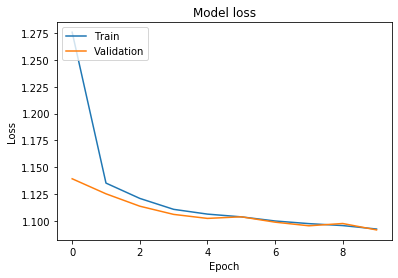

In [29]:
# Plot training & validation loss values
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
test_loss, test_acc = model_a.evaluate(test_images_a, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 27us/sample - loss: 1.0914 - accuracy: 0.5625
Model - 3 layers - test loss: 109.1383410835266
Model - 3 layers - test accuracy: 56.25


------------------------------------------------------

## Clustering com K-means

**Optamos pela utilização das imagens reduzidas por meio do PCA, já que obtiveram por meio deste modelo os melhores resultados de predição na rede neural.**

In [31]:
train_images_k = train_images_r
test_images_k = test_images_r

**Construção do modelo do k-means com 10 clusters.**

In [32]:
kmean_model = KMeans(n_clusters=10, random_state=10)
y_km = kmean_model.fit(train_images_k)
labels = kmean_model.labels_

In [33]:
cluster_centroids = kmean_model.cluster_centers_

In [34]:
silhouette_score(X = train_images_k, labels = labels, random_state = 10)

0.36336109398593913

In [35]:
metrics.v_measure_score(train_labels.values.ravel(), labels, beta=1.0)

0.4455785750478227

---------------------------------
## Clustering com o DBScan
